## 2: Initial Data Exploration

In this section we explore the dataset to reveal some of their characteristics.

First, a correlation analysis between the quantitative data is performed to reveal the relationship between some educational aspects and other variables like gender and overall mean (promedio acumulado).

In the second place, an alysis of the scores for the educational aspects on their distribution.

In third place, we move to the text to perform the initial exploration of the comments using Term Frequency Inverse Document Frequency (TF-IDF) and use that text representation to create a Word Cloud.

Lastly, we performed a Latent Dirichlet Allocation (LDA) analysis to observe if the LDA algorithm is capable of observe 8 categories/topics (in this case, educational aspects) and the coherience metrics that results from that analysis.

### Correlation Analysis

Using Perason and Point-biserial correlation coefficients.

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
from scipy import stats
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


/var/folders/dy/xr0vlym16y5cwngj_4p43nd40000gn/T/ipykernel_10177/2704178968.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Columns that we want to use
columns = ['MET', 'PRA', 'ASE', 'EVA', 'RET', 'APR', 'DOM', 'REC', 'MEJ', 'GÉNERO ALUMNO', 'PROM ACUMULADO EN PROFESIONAL', 'Género del profesor', 'Por qué no lo recomendarias', 'Comentarios']
aspects = ['MET', 'PRA', 'ASE', 'EVA', 'RET', 'APR', 'DOM', 'REC', 'MEJ']

In [3]:
df_ecoas=pd.read_csv('./datasets/df_ready.csv', index_col=0)
df_ecoas.head()

,MET,PRA,ASE,EVA,RET,APR,DOM,REC,MEJ,GÉNERO ALUMNO,PROM ACUMULADO EN PROFESIONAL,Género del profesor,Tipo Comentario,Comentarios,AVG,Sentences,Lemm,Sentences_Lemm
0,5.0,10.0,8.0,9.0,10.0,5.0,4.0,4.0,0.0,0,94.428,0.0,0,"Sabe explicar muy bien las cosas teoricas, pe...",7.2,"[[Sabe explicar muy bien las cosas teoricas, p...","['saber', 'explicar', 'bien', 'cosa', 'teorico...","[['saber', 'explicar', 'bien', 'cosa', 'teoric..."
1,5.0,7.0,8.0,8.0,5.0,5.0,8.0,8.0,0.0,0,95.968,0.0,0,Método anticuado de enseñar. Los temas podría...,6.3,"[[Método anticuado de enseñar.], [Los temas po...","['método', 'anticuado', 'enseñar', 'tema', 'po...","[['método', 'anticuado', 'enseñar'], ['tema', ..."
2,8.0,10.0,8.0,5.0,10.0,10.0,10.0,10.0,1.0,0,96.408,0.0,1,"Sabe muchísimo del tema, muy preparada.",8.8,"[[Sabe muchísimo del tema, muy preparada.]]","['saber', 'muchísimo', 'tema', 'preparado']","[['saber', 'muchísimo', 'tema', 'preparado']]"
3,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0,94.981,0.0,2,buena maestra si lo recomiendo,10.0,[[buena maestra si lo recomiendo]],"['buen', 'maestro', 'si', 'recomer']","[['buen', 'maestro', 'si', 'recomer']]"
4,9.0,9.0,9.0,9.0,9.0,9.0,10.0,9.0,1.0,0,89.040,0.0,1,Tiene mucho conocimiento sobre los temas.,9.0,[[Tiene mucho conocimiento sobre los temas.]],"['conocimiento', 'tema']","[['conocimiento', 'tema']]"


In [4]:
df_ecoas.corr(numeric_only=True)

,MET,PRA,ASE,EVA,RET,APR,DOM,REC,MEJ,GÉNERO ALUMNO,PROM ACUMULADO EN PROFESIONAL,Género del profesor,Tipo Comentario,AVG
MET,1.000000,0.836535,0.753400,0.734603,0.758998,0.820568,0.676982,0.810059,0.553982,0.003939,-0.014612,-0.020835,0.150852,0.922863
PRA,0.836535,1.000000,0.735511,0.713663,0.734674,0.786701,0.676210,0.746817,0.485600,-0.003888,0.003705,-0.021157,0.139490,0.892518
ASE,0.753400,0.735511,1.000000,0.725207,0.691238,0.793709,0.659833,0.715627,0.435738,-0.010055,0.022699,-0.014326,0.144428,0.821573
EVA,0.734603,0.713663,0.725207,1.000000,0.690902,0.747454,0.622844,0.706276,0.431899,-0.007620,0.007781,-0.022037,0.127560,0.852260
RET,0.758998,0.734674,0.691238,0.690902,1.000000,0.779791,0.676787,0.712234,0.475533,-0.016507,-0.008949,0.000912,0.138986,0.866408
APR,0.820568,0.786701,0.793709,0.747454,0.779791,1.000000,0.705294,0.820007,0.520176,-0.009340,0.000545,-0.017019,0.174272,0.924369
DOM,0.676982,0.676210,0.659833,0.622844,0.676787,0.705294,1.000000,0.647179,0.386209,-0.007940,0.009622,0.008138,0.150319,0.744898
REC,0.810059,0.746817,0.715627,0.706276,0.712234,0.820007,0.647179,1.000000,0.584817,0.007141,-0.016392,-0.009404,0.198173,0.905530
MEJ,0.553982,0.485600,0.435738,0.431899,0.475533,0.520176,0.386209,0.584817,1.000000,-0.014627,-0.036287,0.009828,0.066324,0.572997
GÉNERO ALUMNO,0.003939,-0.003888,-0.010055,-0.007620,-0.016507,-0.009340,-0.007940,0.007141,-0.014627,1.000000,-0.172352,0.067672,0.019115,-0.004185


In [6]:
df_ecoas['MEJ'].value_counts() # Now lets focus on binary variables. MEJ

MEJ
1.0    63162
0.0    33378
Name: count, dtype: int64

In [7]:
df_ecoas[['APR', 'DOM', 'EVA', 'MET', 'PRA', 'REC', 'RET', 'ASE', 'AVG']].corrwith(df_ecoas['MEJ'], method=stats.pointbiserialr)

,APR,DOM,EVA,MET,PRA,REC,RET,ASE,AVG
0,0.520176,0.386209,0.431899,0.553982,0.4856,0.584817,0.475533,0.435738,0.572997
1,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000


In [8]:
df_ecoas['GÉNERO ALUMNO'].value_counts()

GÉNERO ALUMNO
1    50878
0    45662
Name: count, dtype: int64

In [9]:
df_ecoas[['APR', 'DOM', 'EVA', 'MEJ', 'MET', 'PRA', 'REC', 'RET', 'ASE', 'AVG']].corrwith(df_ecoas['GÉNERO ALUMNO'], method=stats.pointbiserialr)

,APR,DOM,EVA,MEJ,MET,PRA,REC,RET,ASE,AVG
0,-0.009340,-0.007940,-0.007620,-0.014627,0.003939,-0.003888,0.007141,-1.650675e-02,-0.010055,-0.004185
1,0.003709,0.013618,0.017904,0.000005,0.220966,0.227074,0.026506,2.911677e-07,0.001783,0.193507


In [10]:
df_ecoas['Género del profesor'].value_counts()

Género del profesor
1.0    56013
0.0    40062
Name: count, dtype: int64

In [11]:
df_ecoas[['APR', 'DOM', 'EVA', 'MEJ', 'MET', 'PRA', 'REC', 'RET', 'ASE', 'AVG']].corrwith(df_ecoas['Género del profesor'])

APR   -0.017019
DOM    0.008138
EVA   -0.022037
MEJ    0.009828
MET   -0.020835
PRA   -0.021157
REC   -0.009404
RET    0.000912
ASE   -0.014326
AVG   -0.016420
dtype: float64

### Distribution Analysis

*We are using the Kernel Density Estimation, which is a non-parametric way to estimate the probability density function (PDF) of a random variable. This method is used to get a smooth curve (function) that is a good guess of the distribution of a set of data*

*As we can observe, the distribution of the average scores is highly umbalanced.*

<Axes: ylabel='Frequency'>

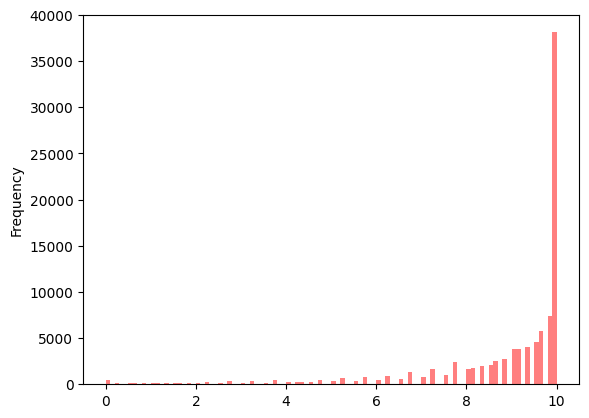

In [12]:
df_ecoas['AVG'].plot(kind='hist', bins=100, alpha=0.5, color='r', label='AVG')

<Axes: ylabel='Frequency'>

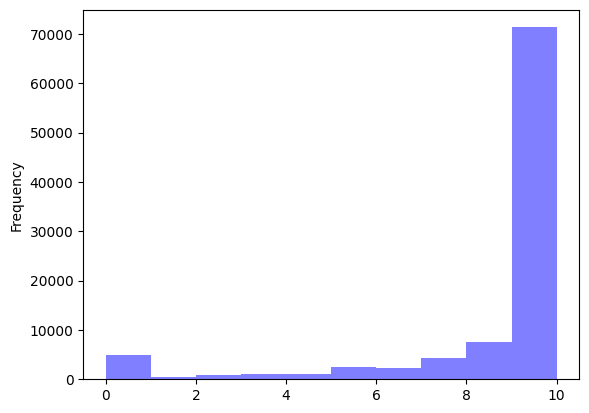

In [13]:
df_ecoas['REC'].plot(kind='hist', alpha=0.5, color='b', label='REC')

*For the question "Would you consider this professors as one of the best you have ever had?", measured by the aspect MEJ, we can observe that the umbalance also exists but not in the same distribution as the AVG score.*

*This motivated us to perform a threshold for the AVG score and observe if the umbalance could follow a similar distribution like the one below.*

*Remember that the MEJ aspect has:*
- *Considered as on the bests -> 63,162*
- *Not considered as on the bests -> 33,378*

In [14]:
yes = 63162
no = 33378
total = yes + no
print(f'The percentage of YES is: {round(yes/total*100,2)}%')
print(f'The percentage of NO is: {round(no/total*100,2)}%')

The percentage of YES is: 65.43%
The percentage of NO is: 34.57%


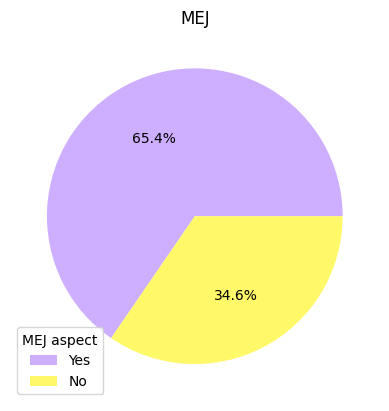

In [15]:
df_ecoas['MEJ'].value_counts().plot(kind='pie', labels=['',''], autopct='%1.1f%%', colors=['#CDAEFF', '#FFF969'])
plt.legend(['Yes', 'No'],title='MEJ aspect')
plt.ylabel('')
plt.title("MEJ")
plt.savefig('./figures/MEJ_pie.png', dpi=300)


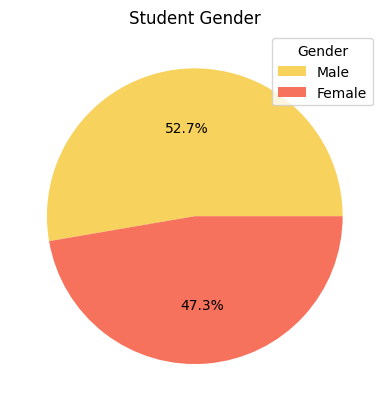

In [16]:
df_ecoas['GÉNERO ALUMNO'].value_counts().plot(kind='pie', labels=['',''], autopct='%1.1f%%', colors=['#F7D25C', '#F7725C'])
plt.legend(['Male', 'Female'],title='Gender')
plt.ylabel('')
plt.title("Student Gender")
plt.savefig('./figures/student_gender_pie.png', dpi=300)


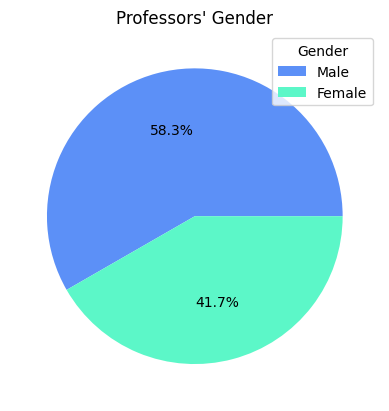

In [17]:
df_ecoas['Género del profesor'].value_counts().plot(kind='pie', labels=['',''], autopct='%1.1f%%', colors=['#5C90F7', '#5CF7C8'])
plt.legend(['Male', 'Female'],title='Gender')
plt.ylabel('')
plt.title("Professors' Gender")
plt.savefig('./figures/professor_gender_pie.png', dpi=300)


*There is another imbalance in the "kind of comment" label, the majority of students wrote positive-only comments (1), followed by positive-and-negative comments (2) and only a small portion of the students wrote negative-only (0) comments.*

In [18]:
df_ecoas['Tipo Comentario'].value_counts()

Tipo Comentario
1    54586
2    33131
0     8823
Name: count, dtype: int64

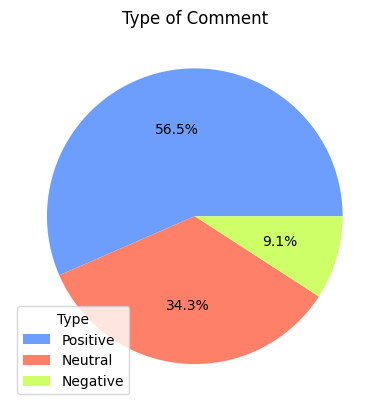

In [19]:
df_ecoas['Tipo Comentario'].value_counts().plot(kind='pie', labels=['','',''], autopct='%1.1f%%', colors=['#6D9EFE', '#FF8069','#CEFF69'])
plt.legend(['Positive', 'Neutral', 'Negative'], title='Type')
plt.ylabel('')
plt.title("Type of Comment")
plt.savefig('./figures/typecomm_pie.png', dpi=300)


In [20]:
df_ecoas.head()

,MET,PRA,ASE,EVA,RET,APR,DOM,REC,MEJ,GÉNERO ALUMNO,PROM ACUMULADO EN PROFESIONAL,Género del profesor,Tipo Comentario,Comentarios,AVG,Sentences,Lemm,Sentences_Lemm
0,5.0,10.0,8.0,9.0,10.0,5.0,4.0,4.0,0.0,0,94.428,0.0,0,"Sabe explicar muy bien las cosas teoricas, pe...",7.2,"[[Sabe explicar muy bien las cosas teoricas, p...","['saber', 'explicar', 'bien', 'cosa', 'teorico...","[['saber', 'explicar', 'bien', 'cosa', 'teoric..."
1,5.0,7.0,8.0,8.0,5.0,5.0,8.0,8.0,0.0,0,95.968,0.0,0,Método anticuado de enseñar. Los temas podría...,6.3,"[[Método anticuado de enseñar.], [Los temas po...","['método', 'anticuado', 'enseñar', 'tema', 'po...","[['método', 'anticuado', 'enseñar'], ['tema', ..."
2,8.0,10.0,8.0,5.0,10.0,10.0,10.0,10.0,1.0,0,96.408,0.0,1,"Sabe muchísimo del tema, muy preparada.",8.8,"[[Sabe muchísimo del tema, muy preparada.]]","['saber', 'muchísimo', 'tema', 'preparado']","[['saber', 'muchísimo', 'tema', 'preparado']]"
3,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0,94.981,0.0,2,buena maestra si lo recomiendo,10.0,[[buena maestra si lo recomiendo]],"['buen', 'maestro', 'si', 'recomer']","[['buen', 'maestro', 'si', 'recomer']]"
4,9.0,9.0,9.0,9.0,9.0,9.0,10.0,9.0,1.0,0,89.040,0.0,1,Tiene mucho conocimiento sobre los temas.,9.0,[[Tiene mucho conocimiento sobre los temas.]],"['conocimiento', 'tema']","[['conocimiento', 'tema']]"


#### Using a threshold to change the data distribution
*We will use a scale to define a threshold and change the values in the aspects from a 11-point scale to binary variables*

In [21]:
scales = [[0, 9, 0], [9.1, 10, 1]]
scales

[[0, 9, 0], [9.1, 10, 1]]

In [22]:
aspects.append('AVG')
aspects.remove('MEJ') # we remove MEJ because we don't want to use the scale on that column
aspects

['MET', 'PRA', 'ASE', 'EVA', 'RET', 'APR', 'DOM', 'REC', 'AVG']

In [23]:
df_before_scale = df_ecoas.copy() # We save a dataframe copy just in case

In [24]:
for asp in aspects:
    for sc in scales:
        df_ecoas[asp] = np.where((df_ecoas[asp] >= sc[0]) & (df_ecoas[asp] <= sc[1]), sc[2], df_ecoas[asp])
df_ecoas = df_ecoas.reset_index(drop=True)
df_ecoas.head()

,MET,PRA,ASE,EVA,RET,APR,DOM,REC,MEJ,GÉNERO ALUMNO,PROM ACUMULADO EN PROFESIONAL,Género del profesor,Tipo Comentario,Comentarios,AVG,Sentences,Lemm,Sentences_Lemm
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,94.428,0.0,0,"Sabe explicar muy bien las cosas teoricas, pe...",0.0,"[[Sabe explicar muy bien las cosas teoricas, p...","['saber', 'explicar', 'bien', 'cosa', 'teorico...","[['saber', 'explicar', 'bien', 'cosa', 'teoric..."
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,95.968,0.0,0,Método anticuado de enseñar. Los temas podría...,0.0,"[[Método anticuado de enseñar.], [Los temas po...","['método', 'anticuado', 'enseñar', 'tema', 'po...","[['método', 'anticuado', 'enseñar'], ['tema', ..."
2,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0,96.408,0.0,1,"Sabe muchísimo del tema, muy preparada.",0.0,"[[Sabe muchísimo del tema, muy preparada.]]","['saber', 'muchísimo', 'tema', 'preparado']","[['saber', 'muchísimo', 'tema', 'preparado']]"
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,94.981,0.0,2,buena maestra si lo recomiendo,1.0,[[buena maestra si lo recomiendo]],"['buen', 'maestro', 'si', 'recomer']","[['buen', 'maestro', 'si', 'recomer']]"
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,89.040,0.0,1,Tiene mucho conocimiento sobre los temas.,0.0,[[Tiene mucho conocimiento sobre los temas.]],"['conocimiento', 'tema']","[['conocimiento', 'tema']]"


*Now all the columns are more or less in the same proportions*

In [25]:
for asp in aspects:
  print(df_ecoas[asp].value_counts(normalize = True))
  print('- - - - - - - - - - - - ')
# MEJ is not in aspects so we print it separated
print(df_ecoas['MEJ'].value_counts(normalize = True))
print('- - - - - - - - - - - - ')

MET
1.0    0.553543
0.0    0.446457
Name: proportion, dtype: float64
- - - - - - - - - - - - 
PRA
1.0    0.592863
0.0    0.407137
Name: proportion, dtype: float64
- - - - - - - - - - - - 
ASE
1.0    0.679946
0.0    0.320054
Name: proportion, dtype: float64
- - - - - - - - - - - - 
EVA
1.0    0.61417
0.0    0.38583
Name: proportion, dtype: float64
- - - - - - - - - - - - 
RET
1.0    0.627056
0.0    0.372944
Name: proportion, dtype: float64
- - - - - - - - - - - - 
APR
1.0    0.634359
0.0    0.365641
Name: proportion, dtype: float64
- - - - - - - - - - - - 
DOM
1.0    0.791838
0.0    0.208162
Name: proportion, dtype: float64
- - - - - - - - - - - - 
REC
1.0    0.635788
0.0    0.364212
Name: proportion, dtype: float64
- - - - - - - - - - - - 
AVG
1.0    0.659364
0.0    0.340636
Name: proportion, dtype: float64
- - - - - - - - - - - - 
MEJ
1.0    0.654257
0.0    0.345743
Name: proportion, dtype: float64
- - - - - - - - - - - - 


*This is how the distribution of the data set looked before.*

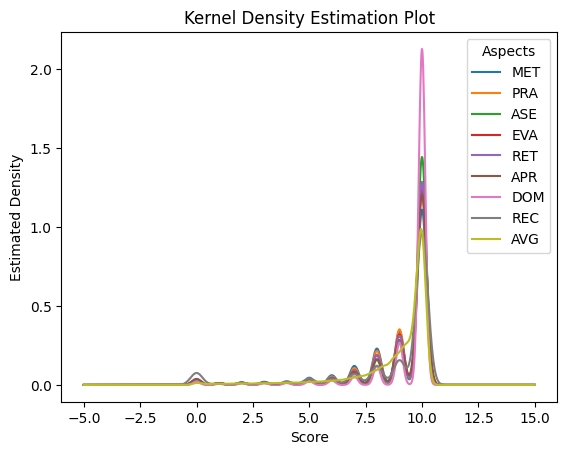

In [26]:
df_before_scale[aspects].plot(kind='kde')
# Add legend to plot
plt.title('Kernel Density Estimation Plot')
plt.legend(aspects, title='Aspects')
plt.xlabel("Score")
plt.ylabel("Estimated Density")
plt.savefig('./figures/initial_distribution_kde.png', dpi=300)
plt.show()

Using a threshold, help us in reducing the variability since as shown before, that highly correlated values are not beneficial for the model. The distribution shape will change completely, and will now have a binomial-like distribution where the data points are categorized into one of two groups 0 or 1

In [27]:
aspects.append('MEJ')
aspects

['MET', 'PRA', 'ASE', 'EVA', 'RET', 'APR', 'DOM', 'REC', 'AVG', 'MEJ']

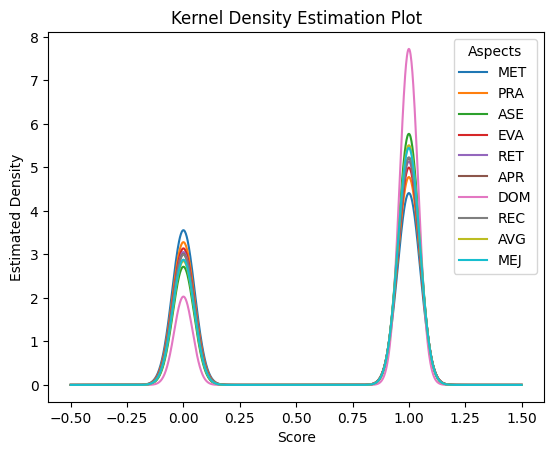

In [28]:
df_ecoas[aspects].plot(kind='kde')
# Add legend to plot
plt.title('Kernel Density Estimation Plot')
plt.legend(aspects, title='Aspects')
plt.xlabel("Score")
plt.ylabel("Estimated Density")
plt.savefig('./figures/scaled_distribution_kde.png', dpi=300)
plt.show()

The loss of information is evidenced in the new correlation matrix after the threshold is applied. As we can see, the data is now less correlated.

In [29]:
df_ecoas[aspects].corr(numeric_only=True)

,MET,PRA,ASE,EVA,RET,APR,DOM,REC,AVG,MEJ
MET,1.000000,0.678493,0.586884,0.595120,0.591797,0.652667,0.481867,0.643885,0.722244,0.515698
PRA,0.678493,1.000000,0.585748,0.587389,0.585109,0.627789,0.497040,0.576138,0.692816,0.451169
ASE,0.586884,0.585748,1.000000,0.594202,0.562146,0.640972,0.525602,0.553703,0.636778,0.424440
EVA,0.595120,0.587389,0.594202,1.000000,0.564576,0.603655,0.476445,0.545489,0.662359,0.397419
RET,0.591797,0.585109,0.562146,0.564576,1.000000,0.639670,0.523072,0.542073,0.667774,0.450993
APR,0.652667,0.627789,0.640972,0.603655,0.639670,1.000000,0.559006,0.650932,0.749716,0.522158
DOM,0.481867,0.497040,0.525602,0.476445,0.523072,0.559006,1.000000,0.519374,0.566323,0.422767
REC,0.643885,0.576138,0.553703,0.545489,0.542073,0.650932,0.519374,1.000000,0.754702,0.599114
AVG,0.722244,0.692816,0.636778,0.662359,0.667774,0.749716,0.566323,0.754702,1.000000,0.589248
MEJ,0.515698,0.451169,0.424440,0.397419,0.450993,0.522158,0.422767,0.599114,0.589248,1.000000


In [30]:
df_ecoas.head()

,MET,PRA,ASE,EVA,RET,APR,DOM,REC,MEJ,GÉNERO ALUMNO,PROM ACUMULADO EN PROFESIONAL,Género del profesor,Tipo Comentario,Comentarios,AVG,Sentences,Lemm,Sentences_Lemm
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,94.428,0.0,0,"Sabe explicar muy bien las cosas teoricas, pe...",0.0,"[[Sabe explicar muy bien las cosas teoricas, p...","['saber', 'explicar', 'bien', 'cosa', 'teorico...","[['saber', 'explicar', 'bien', 'cosa', 'teoric..."
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,95.968,0.0,0,Método anticuado de enseñar. Los temas podría...,0.0,"[[Método anticuado de enseñar.], [Los temas po...","['método', 'anticuado', 'enseñar', 'tema', 'po...","[['método', 'anticuado', 'enseñar'], ['tema', ..."
2,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0,96.408,0.0,1,"Sabe muchísimo del tema, muy preparada.",0.0,"[[Sabe muchísimo del tema, muy preparada.]]","['saber', 'muchísimo', 'tema', 'preparado']","[['saber', 'muchísimo', 'tema', 'preparado']]"
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,94.981,0.0,2,buena maestra si lo recomiendo,1.0,[[buena maestra si lo recomiendo]],"['buen', 'maestro', 'si', 'recomer']","[['buen', 'maestro', 'si', 'recomer']]"
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,89.040,0.0,1,Tiene mucho conocimiento sobre los temas.,0.0,[[Tiene mucho conocimiento sobre los temas.]],"['conocimiento', 'tema']","[['conocimiento', 'tema']]"


In [32]:
df_ecoas.to_csv('./datasets/df_scaled.csv')